In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import tracemalloc
import time
import matplotlib.pyplot as plt




# We will first benchmark the Equilibrium Chemistry version of the code here

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m+0.0_co1.0.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [4]:

T_eff= 1000
grav = 1000
nlevel = 91

## Brown Dwarf 
T_star = "NA"
semi_major = "NA" # AU
self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz
##



In [5]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




pressure=np.logspace(np.log10(1.77000392e-04),np.log10(500.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(400)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i]-10 # perturb the profile
    
nofczns = 1
nstr = np.array([0,83,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = False # not cloudy
fsed = 0.0

    

In [6]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)


In [7]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final, df, all_profiles = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = False, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  103.23049060901626 1985.1655104592066 , flux balance  -0.971326668095123
Iteration number  1 , min , max temp  184.6813517435442 2794.3431310482392 , flux balance  -0.434401060237866
Iteration number  2 , min , max temp  321.3090068528875 3546.721961402058 , flux balance  0.25288250711651017
Iteration number  3 , min , max temp  324.89591546329416 3337.3469136824965 , flux balance  0.028785701827306477
Iteration number  4 , min , max temp  321.68819449583106 3303.5239681213848 , flux balance  0.000694751094138437
Iteration number  5 , min , max temp  320.1826966079383 3302.7342617923446 , flux balance  6.058033416623536e-06
 We are already at a root, tolf , test =  5e-05 ,  1.1571349140314409e-05
Big iteration is  320.1826966079383 0
Iteration number  0 , min , max temp  329.6067616758554 3500.970950762991 , flux balance  -0.4416236206130839
Iteration number  1 , min , max temp  347.547993596351 5199.9 , flux balance  0.1618534427173448
Iteration n

Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

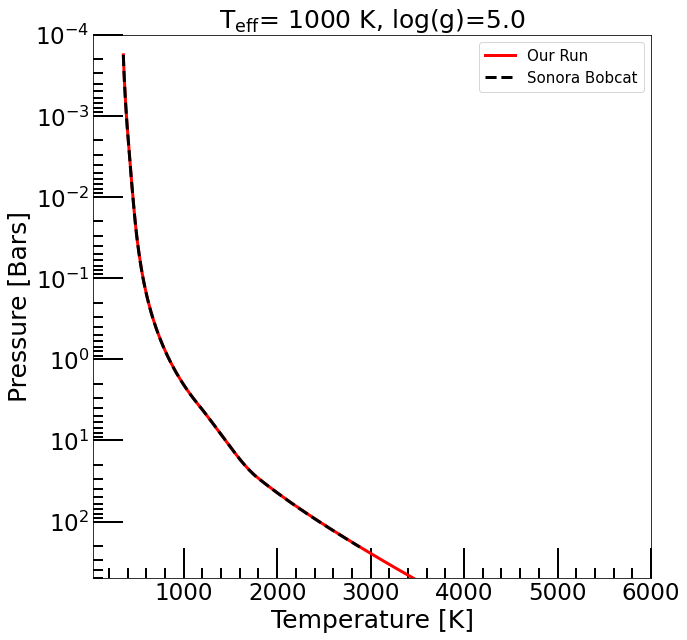

In [8]:
# lets load bobcat model now
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(500,1e-4)
plt.xlim(30,6000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")
plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)





In [8]:
#great lets save the outputs of our run to variables first
t_eq,p_eq,df_eq = np.copy(temp), np.copy(pressure), df

#  Lets now run the DEQ part of the code but with Kzz =1e-500 effectively 0


In [9]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




pressure=np.logspace(np.log10(1.77000392e-04),np.log10(205.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i]-100 # perturb the profile
    kz[i] = 1e-500 #0
    
nofczns = 1
nstr = np.array([0,77,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = False # not cloudy
fsed = 0.0

In [10]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)


In [11]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  284.0261728236035 2776.1945781806103 , flux balance  -0.2646417234621574
Iteration number  1 , min , max temp  360.98248204461225 2873.0396814071237 , flux balance  0.041071261276620925
Iteration number  2 , min , max temp  341.5849738171053 2865.1649817207663 , flux balance  0.0007748628644682462
Iteration number  3 , min , max temp  339.5779349998592 2865.0690841475584 , flux balance  1.0606685331743558e-06
 We are already at a root, tolf , test =  5e-05 ,  1.803728034916811e-06
Big iteration is  339.5779349998592 0
Iteration number  0 , min , max temp  355.01123402387475 2884.119461192821 , flux balance  0.001231232799478704
Iteration number  1 , min , max temp  353.965837745141 2883.851934046104 , flux balance  2.122556042161872e-06
Converged Solution in iterations  1
Big iteration is  353.965837745141 1
Iteration number  0 , min , max temp  355.79499335967415 2887.3811836808536 , flux balance  2.191378230862432e-05
 We are already at a root, t

Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

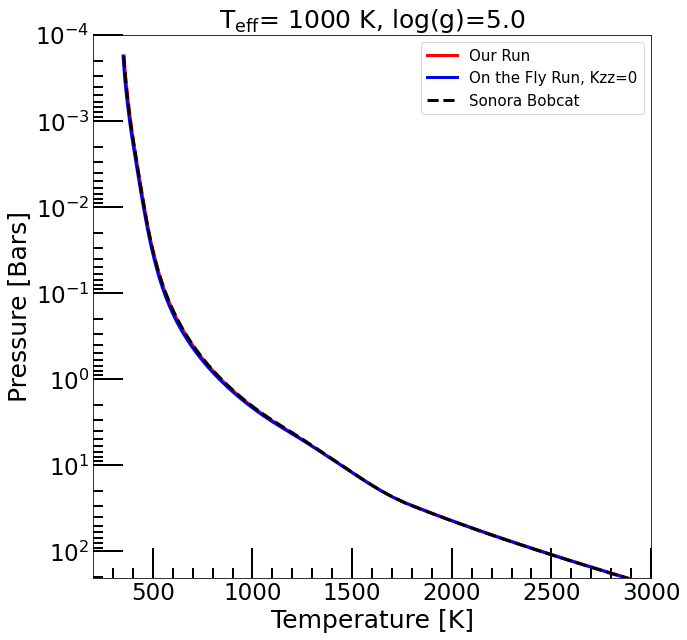

In [12]:
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(200,3000)

plt.semilogy(t_eq,p_eq,color="r",linewidth=3,label="Our Run")
plt.semilogy(temp,pressure,color="b",linewidth=3,label="On the Fly Run, Kzz=0")
plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)



Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

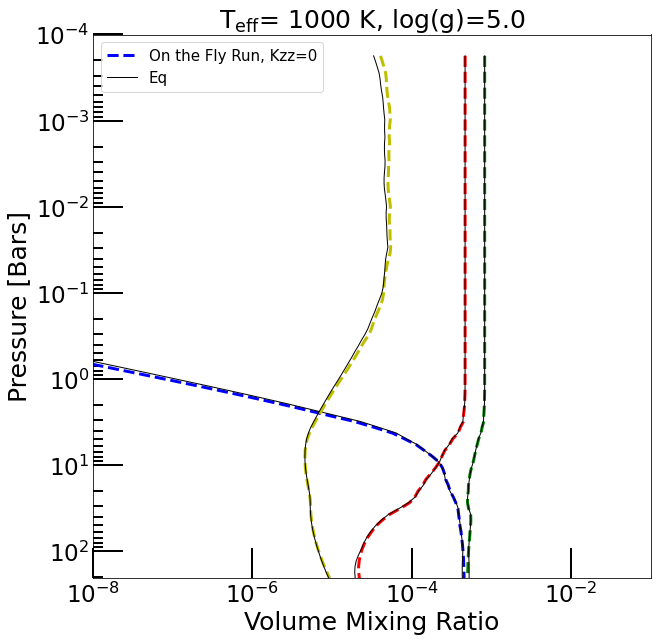

In [25]:
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Volume Mixing Ratio', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(1e-8,1e-1)


plt.loglog(df['CO'],pressure,color="b",linewidth=3,linestyle="--",label="On the Fly Run, Kzz=0")
plt.loglog(df_eq['CO'],p_eq,color="k",linewidth=1,label="Eq")

plt.loglog(df['CH4'],pressure,color="r",linewidth=3,linestyle="--")
plt.loglog(df_eq['CH4'],p_eq,color="k",linewidth=1)

plt.loglog(df['H2O'],pressure,color="g",linewidth=3,linestyle="--")
plt.loglog(df_eq['H2O'],p_eq,color="k",linewidth=1)

plt.loglog(df['NH3'],pressure,color="y",linewidth=3,linestyle="--")
plt.loglog(df_eq['NH3'],p_eq,color="k",linewidth=1)



plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)
